##### Let's start by importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
data=pd.read_csv('train.csv')

In [3]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##### Understanding the Data

In [5]:
data.shape

(1460, 81)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##### Checking Percentage Of Missing Values in the Dataset

In [8]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

##### We will drop the columns having high missing values and also the ID as it wont be useful for further analysis

In [9]:
data.drop(['Id','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

### Data Cleaning

##### We can see that in many columns NaN values does not represent the actual Null values but they are having some specific value allocated to them, so we will replace the nulls with their corresponding values

In [10]:
data['Alley']=data['Alley'].fillna('No alley access')
data['BsmtQual']=data['BsmtQual'].fillna('No Basement')
data['BsmtCond']=data['BsmtCond'].fillna('No Basement')
data['BsmtExposure']=data['BsmtExposure'].fillna('No Basement')
data['BsmtFinType1']=data['BsmtFinType1'].fillna('No Basement')
data['BsmtFinType2']=data['BsmtFinType2'].fillna('No Basement')
data['FireplaceQu']=data['FireplaceQu'].fillna('No Fireplace')
data['GarageType']=data['GarageType'].fillna('No Garage')
data['GarageFinish']=data['GarageFinish'].fillna('No Garage')
data['GarageQual']=data['GarageQual'].fillna('No Garage')
data['GarageCond']=data['GarageCond'].fillna('No Garage')

##### Again Checking for null values

In [11]:
data.isnull().sum()[data.isnull().sum()>0]

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

- After Replacing the null values of the respective columns with the corresponding values null counts is greatly reduced
- We can see that the only Column __LotFrontage__ Which has 17.74% of Null values since that is a numeric column that can be replaced with Mean or Median
- There are few more columns which has very less number of nulls in them but they can also be imputed with the median or mode depending upon the type of column i.e Numeric or Categorical

In [12]:
data.LotFrontage = data.LotFrontage.fillna(0)
data.MasVnrType = data.MasVnrType.fillna(0)
data.MasVnrArea = data.MasVnrArea.fillna(data.MasVnrArea.median())

Here the GarageYrBlt is a numeric column but still this can be replaced with the mode value because it is a column which contains the Year values

In [13]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())
data.Electrical = data.Electrical.fillna(data.Electrical.mode()[0])

### Visualizing the Data

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

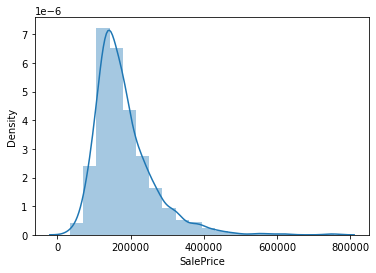

In [14]:
## Introspecting the Distribution of the Target column
fig = plt.figure()
sns.distplot(data['SalePrice'], bins = 20)

- Target column is skewed and lets check the skew value and if it is considerably high lets transform and reduce the skewness

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

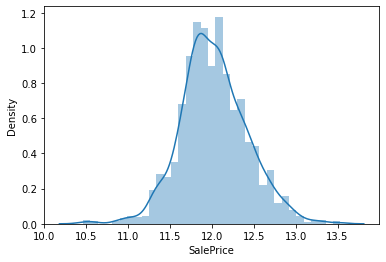

In [15]:
sns.distplot(np.log(data['SalePrice']))

In [16]:
data['TransformedPrice'] = np.log(data['SalePrice'])
data.drop('SalePrice', axis=1, inplace=True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TransformedPrice
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216


### Lets View and understand the columns seperately based up on their Type i.e Numeric or categorical

In [17]:
num_cols=data.describe().columns
cat_cols=[i for i in data.columns if data.dtypes[i]=='object']

In [18]:
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'TransformedPrice'], dtype='object')

In [19]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

- Analysing the __Numerical columns__

In [20]:
num_data = data[num_cols]
num_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TransformedPrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247694
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109011
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317167
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849398
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429216


## Inferences
- The very first thing observed in the numeric columns are the columns which are years i.e __YearBuilt__,__YearRemodAdd__,__GarageYrBlt__,__YrSold__ These Year columns can be converted to No.of years 

- There are columns in which the values are not continous i.e they should not be considerd as Numerical rather they need to be considerd as the categorical values

In [21]:
data['YearBuilt(Age)'] = 2021 - data['YearBuilt']
data['YearRemodAdd(Age)'] = 2021 - data['YearRemodAdd']
data['GarageYrBlt(Age)'] = 2021 - data['GarageYrBlt']
data['YrSold(Age)'] = data['YearBuilt'] - data['YrSold']

In [22]:
data = data.drop(['YearBuilt', 'YearRemodAdd','YrSold', 'GarageYrBlt'], 1)

In [23]:
#converting from int type to object to treat the variables as categorical variables
data['MSSubClass'] = data['MSSubClass'].astype('object')
data['OverallQual'] = data['OverallQual'].astype('object')
data['OverallCond'] = data['OverallCond'].astype('object')
data['BsmtFullBath'] = data['BsmtFullBath'].astype('object')
data['BsmtHalfBath'] = data['BsmtHalfBath'].astype('object')
data['FullBath'] = data['FullBath'].astype('object')
data['HalfBath'] = data['HalfBath'].astype('object')
data['BedroomAbvGr'] = data['BedroomAbvGr'].astype('object')
data['KitchenAbvGr'] = data['KitchenAbvGr'].astype('object')
data['TotRmsAbvGrd'] = data['TotRmsAbvGrd'].astype('object')
data['Fireplaces'] = data['Fireplaces'].astype('object')
data['GarageCars'] = data['GarageCars'].astype('object')


In [24]:
num_cols=data.describe().columns
cat_cols=[i for i in data.columns if data.dtypes[i]=='object']

In [25]:
num_cols

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'TransformedPrice', 'YearBuilt(Age)', 'YearRemodAdd(Age)', 'GarageYrBlt(Age)', 'YrSold(Age)'], dtype='object')

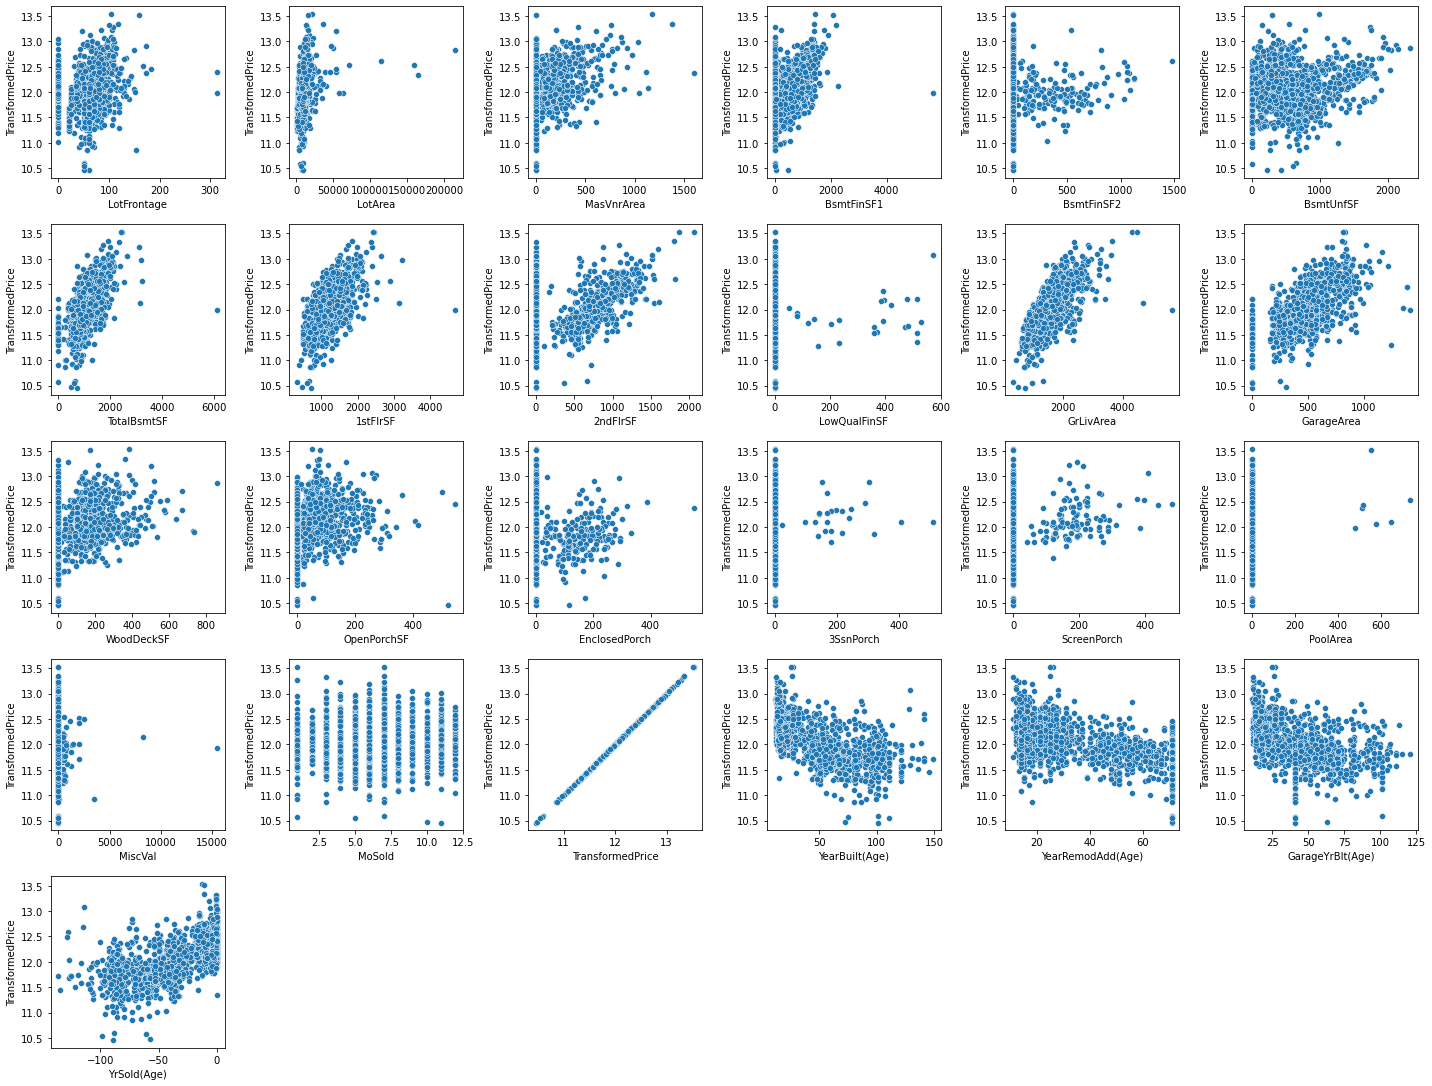

In [26]:
fig=plt.figure(figsize=[20,15])
fig.subplots_adjust(hspace=0.8,wspace=1)
for i in range(0,len(num_cols)):
    ax=fig.add_subplot(5,6,i+1)
    plt.tight_layout()
    sns.scatterplot(x=num_cols[i], y="TransformedPrice", data=data,palette=['green','orange'])

- We can Infer from the variables like GrLivArea,2ndFlrSF,1stFlrSF are seemed to be highly correlated 
- In the rest of the features some tend to behave as categorical by not having the continous values and we can not observe any pattern in the Features so lets look at the heat map in Next step

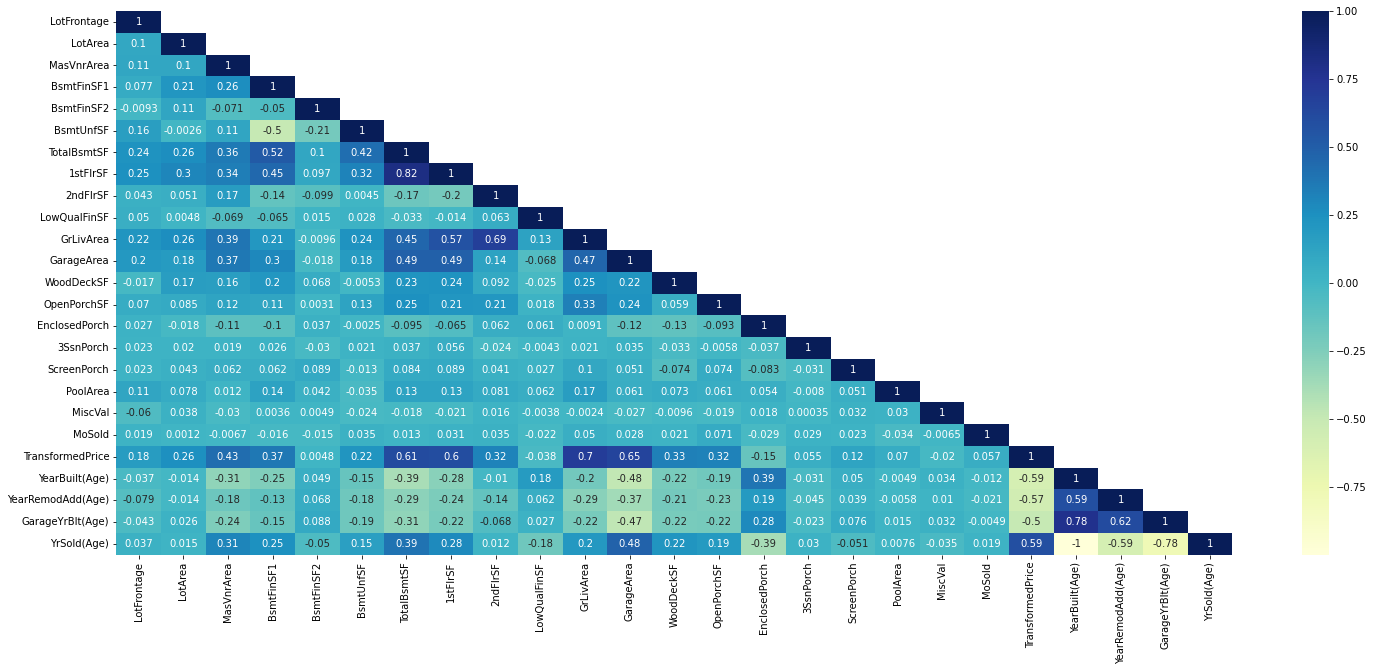

In [27]:
plt.figure(figsize = (25, 10))
corr_matrix = data[num_cols].corr()
mask = np.array(corr_matrix)
mask[ np.tril_indices_from(mask)] = False
sns.heatmap(corr_matrix,annot=True,mask=mask,cmap="YlGnBu")
plt.show()

- Here we can see some Features are having high correlation among them so lets drop them 

In [28]:
data.drop(['1stFlrSF','GarageYrBlt(Age)'],axis=1,inplace=True)

### Analysing the Categorical columns

In [29]:
len(cat_cols)

52

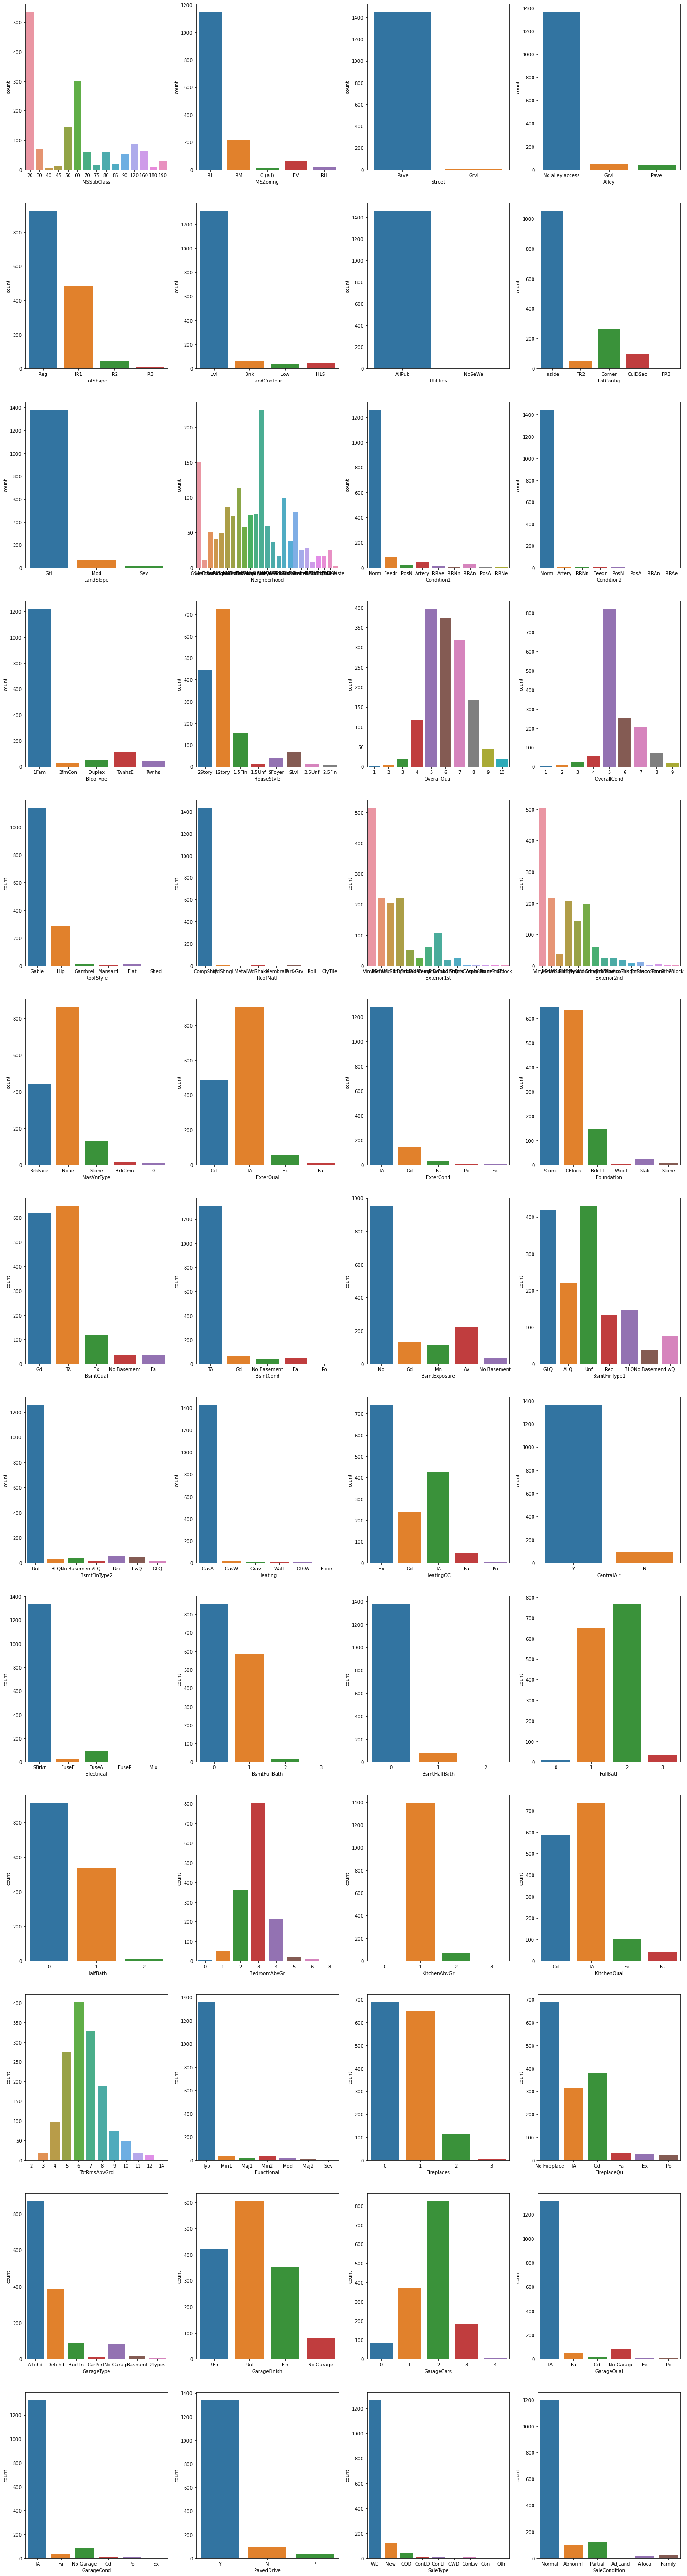

In [30]:
plt.figure(figsize = (25, 100))
for i in range(len(cat_cols)):
    plt.subplot(13,4,i+1)
    sns.countplot(data[cat_cols[i]])

- We can observe that there is one category of values which is dominating in  some features, including This Features might make the model more biased so dropping those would be the good option
- Instead of looking at these  with the naked eye and dropping lets drop them with the code

In [31]:
# find columns where we barely see any variance in the data. If 90% of the data belongs to a single category,
# let's consider that data to be not quite useful to our model

col_list = []
for col in cat_cols:
    mode = data[col].value_counts(normalize=True).reset_index(drop=True)[0]
    if mode >= 0.9:
        col_list.append(col)
        
# deleting variables with too much imbalance

data.drop(col_list, axis=1, inplace=True)

In [32]:
len(data.columns)

61

In [33]:
num_cols=data.describe().columns
cat_cols=[i for i in data.columns if data.dtypes[i]=='object']

In [34]:
cat_cols

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'SaleType',
 'SaleCondition']

In [35]:
def rating_mapper(x):
    return x.map({'Ex': 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0})

def rating_mapper1(x):
    return x.map({'Gd': 4, "Av": 3, "Mn": 2, "No": 1, "None": 0})

def house_status_mapper(x):
    return x.map({'Fin': 3, "RFn": 2, "Unf": 1, "None": 0})

def plot_shape_mapper(x):
    return x.map({'Reg': 3, "IR1": 2, "IR2": 1, "IR3": 0})

def rating_mapper2(x):
    return x.map({'GLQ': 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, 'Unf': 1, 'None': 0})



In [36]:
# Applying the function to the columns
data[['LotShape']] = data[['LotShape']].apply(plot_shape_mapper)
data[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual']] = data[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual']].apply(rating_mapper)
data[['BsmtExposure']] = data[['BsmtExposure']].apply(rating_mapper1)
data[['BsmtFinType1', 'BsmtFinType2']] = data[['BsmtFinType1', 'BsmtFinType2']].apply(rating_mapper2)
data[['GarageFinish']] = data[['GarageFinish']].apply(house_status_mapper)

In [37]:
objct_cols=['LotShape','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 
            'FireplaceQu', 'GarageQual','BsmtExposure','BsmtFinType1', 'BsmtFinType2','GarageFinish']
for i in objct_cols:
    data[i]=data[i].astype(object)

In [38]:
num_cols=data.describe().columns
cat_cols=[i for i in data.columns if data.dtypes[i]=='object']

### Dummy Value Creation For Categorical Columns

In [39]:
# creating a dummy variables for the categorical variables and dropping the first one.
dummy_vars = pd.get_dummies(data[cat_cols], drop_first=True)

# adding the results to the original dataframe
data = pd.concat([data, dummy_vars], axis=1)

# deleting the original categorical variables which have already been converted
data=data.drop(cat_cols,axis=1)

In [40]:
data.shape

(1460, 249)

In [41]:
num_cols

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'TransformedPrice', 'YearBuilt(Age)', 'YearRemodAdd(Age)', 'YrSold(Age)'], dtype='object')

In [42]:
scalable_features=['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal','YearBuilt(Age)', 'YearRemodAdd(Age)', 'YrSold(Age)']

### Model Building & Evaluation

#### Test-Train Split

In [43]:
X = data.drop("TransformedPrice", axis=1)
y = data["TransformedPrice"]

# split the data into training and test in the ration 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [44]:
scaler=StandardScaler()
X_train[scalable_features]= scaler.fit_transform(X_train[scalable_features])
X_test[scalable_features]=scaler.transform(X_test[scalable_features])

### Model Building using Linear Regression

In [45]:
# list of alphas
params = {
    'alpha':[0.0001, 0.0002, 0.0003, 0.0004, 0.0005,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0,50.0,100.0,500.0,1000.0]
}
print(params)

{'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50.0, 100.0, 500.0, 1000.0]}


In [46]:
# Lasso
lasso = Lasso()
folds = 5
lasso_model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv= folds,
                       return_train_score=True,
                       verbose= 1)
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50.0, 100.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score']).head(10)

,param_alpha,mean_train_score,mean_test_score,rank_test_score
4,0.0005,-0.072898,-0.092065,1
5,0.001,-0.077817,-0.092130,2
2,0.0003,-0.070127,-0.092263,3
3,0.0004,-0.071586,-0.092432,4
1,0.0002,-0.068585,-0.092598,5
0,0.0001,-0.066798,-0.094711,6
6,0.01,-0.111593,-0.115527,7
7,0.05,-0.138016,-0.139407,8
8,0.1,-0.169067,-0.170320,9
9,0.2,-0.258372,-0.259444,10


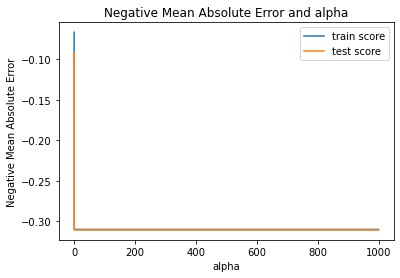

In [48]:
# plot mean test and train scores against alpha

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# plotting

plt.plot(lasso_cv_results['param_alpha'] , lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'] , lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show();

In [49]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0005)

In [50]:
# check the coefficient values with alpha = 0.0003

alpha = 0.0005
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

# create a dataframe with the features and coefficients together

lasso_dtfr = pd.DataFrame({'Features':data.drop("TransformedPrice", axis=1).columns, 'Coefficient':lasso.coef_.round(4)})
lasso_dtfr= lasso_dtfr[lasso_dtfr['Coefficient'] != 0.00]

In [51]:
y_train_pred_lasso=lasso.predict(X_train)
y_test_pred_lasso=lasso.predict(X_test)

In [52]:
print("r2_score for train :",r2_score(y_train,y_train_pred_lasso))
print("r2_score for test :",r2_score(y_test,y_test_pred_lasso))

r2_score for train : 0.9219222728443748
r2_score for test : 0.8718138755394096


In [53]:
# LASSO: MSE for test data
print("LASSO MSE:",mean_squared_error(y_test, lasso.predict(X_test)))

LASSO MSE: 0.021091759856019555


In [54]:
# calculating absolute value of coefficients
lasso_dtfr['Coeff_Abs'] = abs(lasso_dtfr['Coefficient'])

# finding the features most significant to the target variable
lasso_dtfr = lasso_dtfr.sort_values(by="Coeff_Abs",ascending=False).reset_index(drop=True)

# features retained
lasso_dtfr.head()

,Features,Coefficient,Coeff_Abs
0,OverallQual_9,0.1894,0.1894
1,OverallCond_3,-0.1860,0.1860
2,TotRmsAbvGrd_11,-0.1637,0.1637
3,OverallQual_2,-0.1453,0.1453
4,Fireplaces_3,-0.1340,0.1340


### LASSO: Top 10 most significant features

In [55]:
# finding the top 10 significant features using Lasso 

lasso_dtfr.head(10)["Features"]

0           OverallQual_9
1           OverallCond_3
2         TotRmsAbvGrd_11
3           OverallQual_2
4            Fireplaces_3
5               GrLivArea
6    Neighborhood_Crawfor
7           OverallQual_8
8         TotRmsAbvGrd_12
9    Neighborhood_Somerst
Name: Features, dtype: object

## Ridge Regression

In [56]:
# Ridge

ridge = Ridge()
folds = 5
ridge_model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv= folds,
                       return_train_score=True,
                       verbose= 1)
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50.0, 100.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [57]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score']).head(10)

,param_alpha,mean_train_score,mean_test_score,rank_test_score
26,10.0,-0.072962,-0.090546,1
25,9.0,-0.072579,-0.090622,2
24,8.0,-0.072162,-0.090733,3
27,20.0,-0.076021,-0.090752,4
23,7.0,-0.071706,-0.090854,5
22,6.0,-0.071214,-0.090992,6
21,5.0,-0.070672,-0.091195,7
20,4.0,-0.070064,-0.091564,8
19,3.0,-0.069365,-0.092139,9
18,2.0,-0.068491,-0.092970,10


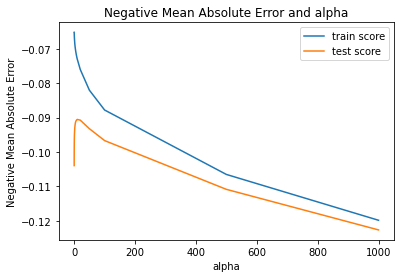

In [58]:
##plot mean test and train scores against alpha

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('float32')

# plotting

plt.plot(ridge_cv_results['param_alpha'] , ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'] , ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show();

In [59]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=10.0)

In [60]:
# check the coefficient values with alpha = 10.0

alpha = 10.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train) 

Ridge(alpha=10.0)

In [61]:
y_train_pred_ridge=ridge.predict(X_train)
y_test_pred_ridge=ridge.predict(X_test)

In [62]:
print("r2_score for train :",r2_score(y_train,y_train_pred_ridge))
print("r2_score for test :",r2_score(y_test,y_test_pred_ridge))

r2_score for train : 0.9242538320229048
r2_score for test : 0.8721000078217448


In [63]:
print("RIDGE MSE:",mean_squared_error(y_test, ridge.predict(X_test)))

RIDGE MSE: 0.021044679616941692


In [64]:
# create a dataframe with the features and coefficients together

ridge_dtfr = pd.DataFrame({'Features':data.drop("TransformedPrice", axis=1).columns, 'Coefficient':ridge.coef_.round(4)})

# we understand ridge doesn't eliminate features, but in case a coeeficient is almost zero 
# (such that the coefficient rounded to 4th decimal place is zero indeed)- filtering out those features

ridge_dtfr = ridge_dtfr[ridge_dtfr['Coefficient'] != 0.00]


In [65]:
# calculating absolute value of coefficients
ridge_dtfr['Coeff_Abs'] = abs(ridge_dtfr['Coefficient'])

# finding the features most significant to the target variable
ridge_dtfr = ridge_dtfr.sort_values(by="Coeff_Abs",ascending=False).reset_index(drop=True)

In [66]:
ridge_dtfr.head()

,Features,Coefficient,Coeff_Abs
0,OverallQual_9,0.1236,0.1236
1,OverallCond_3,-0.1036,0.1036
2,GrLivArea,0.1033,0.1033
3,Neighborhood_Crawfor,0.0959,0.0959
4,OverallQual_8,0.0861,0.0861


In [67]:
# finding the top 10 most significant features

ridge_dtfr.head(10)["Features"]

0           OverallQual_9
1           OverallCond_3
2               GrLivArea
3    Neighborhood_Crawfor
4           OverallQual_8
5    Neighborhood_Edwards
6     Neighborhood_IDOTRR
7    Neighborhood_Somerst
8         TotRmsAbvGrd_11
9            Fireplaces_3
Name: Features, dtype: object

## Subjective Questions

##### 1. What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [68]:
0.0005*2

0.001

- If the alpha for Lasso is doubled to 0.001

In [69]:
# check the coefficient values with alpha = 0.0006

alpha = 0.001
lasso_2 = Lasso(alpha=alpha)
lasso_2.fit(X_train, y_train)

# create a dataframe with the features and coefficients together

lasso_dtfr2 = pd.DataFrame({'Features':data.drop("TransformedPrice", axis=1).columns, 'Coefficient':lasso_2.coef_.round(4)})
lasso_dtfr2 = lasso_dtfr2[lasso_dtfr2['Coefficient'] != 0.00]


In [70]:
y_train_pred_lasso_2=lasso_2.predict(X_train)
y_test_pred_lasso_2=lasso_2.predict(X_test)

In [71]:
print("r2_score for train :",r2_score(y_train,y_train_pred_lasso_2))
print("r2_score for test :",r2_score(y_test,y_test_pred_lasso_2))

r2_score for train : 0.9086904537509086
r2_score for test : 0.8646563692922966


In [72]:
# calculating absolute value of coefficients
lasso_dtfr2['Coeff_Abs'] = abs(lasso_dtfr2['Coefficient'])

# finding the features most significant to the target variable
lasso_dtfr2 = lasso_dtfr2.sort_values(by="Coeff_Abs",ascending=False).reset_index(drop=True)
lasso_dtfr2.head()

,Features,Coefficient,Coeff_Abs
0,OverallCond_3,-0.1747,0.1747
1,OverallQual_9,0.1619,0.1619
2,GrLivArea,0.1231,0.1231
3,OverallQual_8,0.1080,0.1080
4,Fireplaces_2,0.1011,0.1011


In [73]:
# finding the top 10 most significant features

lasso_dtfr2.head(10)["Features"]

0           OverallCond_3
1           OverallQual_9
2               GrLivArea
3           OverallQual_8
4            Fireplaces_2
5    Neighborhood_Crawfor
6    Neighborhood_Somerst
7           MSSubClass_30
8         TotRmsAbvGrd_11
9           OverallCond_4
Name: Features, dtype: object

 - What if alpha value for Ridge is doubled?

In [74]:
# check the coefficient values with alpha = 20.0

alpha = 20.0
ridge_2 = Ridge(alpha=alpha)
ridge_2.fit(X_train, y_train) 

Ridge(alpha=20.0)

In [75]:
# create a dataframe with the features and coefficients together

ridge_dtfr2 = pd.DataFrame({'Features':data.drop("TransformedPrice", axis=1).columns, 'Coefficient':ridge_2.coef_.round(4)})

# we understand ridge doesn't eliminate features, but in case a coeeficient is almost zero 
# (such that the coefficient rounded to 4th decimal place is zero indeed)- filtering out those features

ridge_dtfr2 = ridge_dtfr2[ridge_dtfr2['Coefficient'] != 0.00]


In [76]:
# calculating absolute value of coefficients
ridge_dtfr2['Coeff_Abs'] = abs(ridge_dtfr2['Coefficient'])

# finding the features most significant to the target variable
ridge_dtfr2 = ridge_dtfr2.sort_values(by="Coeff_Abs",ascending=False).reset_index(drop=True)

In [77]:
# finding the top 10 most significant features

ridge_dtfr2.head(10)["Features"]

0               GrLivArea
1           OverallQual_9
2    Neighborhood_Crawfor
3           OverallCond_3
4           OverallQual_8
5    Neighborhood_Edwards
6            Fireplaces_2
7           MSSubClass_30
8     Neighborhood_IDOTRR
9        BsmtExposure_4.0
Name: Features, dtype: object

##### 3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [78]:
# Dropping the top 5 features

top5_features = list(lasso_dtfr[:5]["Features"])
data.drop(top5_features,axis=1,inplace=True)

In [79]:
# Test-Train Split

X = data.drop("TransformedPrice", axis=1).values
y = data["TransformedPrice"].values

# split the data into training and test in the ration 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [80]:
# Lasso

lasso = Lasso()
folds = 5
lasso_model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv= folds,
                       return_train_score=True,
                       verbose= 1)
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50.0, 100.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [81]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score']).head(10)

,param_alpha,mean_train_score,mean_test_score,rank_test_score
2,0.0003,-0.072016,-0.094349,1
3,0.0004,-0.073695,-0.094413,2
1,0.0002,-0.070216,-0.094832,3
4,0.0005,-0.075227,-0.094925,4
5,0.001,-0.080242,-0.095423,5
0,0.0001,-0.068357,-0.096556,6
6,0.01,-0.112083,-0.116587,7
10,0.3,-0.115209,-0.118558,8
9,0.2,-0.115072,-0.118671,9
11,0.4,-0.115677,-0.118791,10


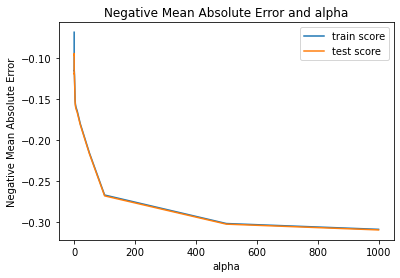

In [82]:
# plotting

plt.plot(lasso_cv_results['param_alpha'] , lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'] , lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show();

In [83]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0003)

In [84]:
# check the coefficient values with alpha = 0.0005

alpha = 0.0003
lasso_3 = Lasso(alpha=alpha)
lasso_3.fit(X_train, y_train) 

Lasso(alpha=0.0003)

In [85]:
# create a dataframe with the features and coefficients together

lasso_dtfr3 = pd.DataFrame({'Features':data.drop("TransformedPrice", axis=1).columns, 'Coefficient':lasso_3.coef_.round(4)})
lasso_dtfr3 = lasso_dtfr3[lasso_dtfr3['Coefficient'] != 0.00]

In [86]:
# calculating absolute value of coefficients
lasso_dtfr3['Coeff_Abs'] = abs(lasso_dtfr3['Coefficient'])

# finding the features most significant to the target variable
lasso_dtfr3 = lasso_dtfr3.sort_values(by="Coeff_Abs",ascending=False).reset_index(drop=True)

# features retained
lasso_dtfr3.head()

,Features,Coefficient,Coeff_Abs
0,MSZoning_RL,0.2150,0.2150
1,MSZoning_FV,0.2136,0.2136
2,MSZoning_RH,0.1925,0.1925
3,MSZoning_RM,0.1743,0.1743
4,Neighborhood_StoneBr,0.1432,0.1432


##### finding the top 10 most significant features

In [87]:
lasso_dtfr3.head(10)["Features"]

0             MSZoning_RL
1             MSZoning_FV
2             MSZoning_RH
3             MSZoning_RM
4    Neighborhood_StoneBr
5             ExterCond_5
6          MSSubClass_160
7           OverallCond_9
8    Neighborhood_MeadowV
9    Neighborhood_NridgHt
Name: Features, dtype: object